## Change all the variable names and put your own written comments explaining everything 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Preprocessing and doing Data Augmentaion to the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

## We don't apply ImageDataGenerator to test dataset because Data augmentation is used to 
## add noise in data so that model can be generalized. There is no meaning to add noise in test data

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/image_dataset_anomaly_detection/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 6633 images belonging to 2 classes.


In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/image_dataset_anomaly_detection/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn_model = tf.keras.models.Sequential()

# Step 1 - Creating a Convolution Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Adding a Pooling layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Adding another convolutional layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 4 - Flattening the layer so that it can be fed to the Dense Layer
cnn_model.add(tf.keras.layers.Flatten())

# Step 5 - Adding a Dense Layer
cnn_model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Converting it to SVM by using the L2 Regularizer parameter
# using activation = linear since for binary classificaiton we use linear SVM
cnn_model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='linear'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Compiling the CNN with loss hinge so it uses SVM
cnn_model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn_model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
208/208 [==============================] - 1619s 8s/step - loss: 0.7807 - accuracy: 0.6237 - val_loss: 0.6278 - val_accuracy: 0.7021
Epoch 2/10
208/208 [==============================] - 25s 119ms/step - loss: 0.5936 - accuracy: 0.7307 - val_loss: 0.4808 - val_accuracy: 0.7972
Epoch 3/10
208/208 [==============================] - 25s 118ms/step - loss: 0.4679 - accuracy: 0.7927 - val_loss: 0.5526 - val_accuracy: 0.8070
Epoch 4/10
208/208 [==============================] - 25s 121ms/step - loss: 0.3895 - accuracy: 0.8310 - val_loss: 0.6719 - val_accuracy: 0.7524
Epoch 5/10
208/208 [==============================] - 25s 119ms/step - loss: 0.3198 - accuracy: 0.8578 - val_loss: 0.5956 - val_accuracy: 0.7958
Epoch 6/10
208/208 [==============================] - 25s 118ms/step - loss: 0.3184 - accuracy: 0.8611 - val_loss: 0.4941 - val_accuracy: 0.8266
Epoch 7/10
208/208 [==============================] - 25s 119ms/step - loss: 0.2541 - accuracy: 0.8895 - val_loss: 0.4663 - val_acc

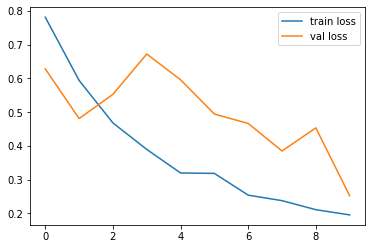

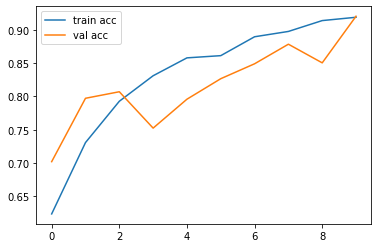

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

cnn_model.save('model_rcat_dog.h5')

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
normal_path = '/content/drive/MyDrive/image_dataset_anomaly_detection/test/normal/cast_ok_0_10.jpeg'
anomaly_path = '/content/drive/MyDrive/image_dataset_anomaly_detection/test/anomaly/cast_def_0_1059.jpeg'

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(normal_path, target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
result

array([[0.8107141]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is Anomaly")
else:
    print("The image classified is Normal")

The image classified is Normal


In [ ]:
#Looping over all in order to calcuclate the evaluation metrics
import os 

test_anomaly_path = "/content/drive/MyDrive/image_dataset_anomaly_detection/test/anomaly/"
test_normal_path = "/content/drive/MyDrive/image_dataset_anomaly_detection/test/normal/"

predicted_values = []
actual_values = []

#Iteration for all the Anomaly Images
for current_image in os.listdir(test_anomaly_path):
  current_image_path = os.path.join(test_anomaly_path, current_image) 

  test_image = image.load_img(current_image_path, target_size = (64,64))
  test_image = image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)

  if result[0]<0:
    predicted_values.append(1)
    ## it is an anomaly
  else:
    predicted_values.append(0)
    ## It is a normal image

  #Appending 1 for every iteration since all the images are anomaly.
  actual_values.append(1)


#Iteration for all the Anomaly Images
for current_image in os.listdir(test_anomaly_path):
  current_image_path = os.path.join(test_anomaly_path, current_image) 

  test_image = image.load_img(current_image_path, target_size = (64,64))
  test_image = image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)

  if result[0]<0:
    predicted_values.append(1)
    ## it is an anomaly
  else:
    predicted_values.append(0)
    ## It is a normal image

  #Appending 1 for every iteration since all the images are anomaly.
  actual_values.append(0)

In [ ]:
#Evaluating the Model using different Metrics

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


print("Precision score of the model %.3f" % (precision_score(actual_values,predicted_values)))
print("Recall score of the model %.3f" % (recall_score(actual_values,predicted_values)))
print("F1 score of the model %.3f" % (f1_score(actual_values,predicted_values)))

print("\nAccuracy score of the model %.3f" % (accuracy_score(actual_values,predicted_values)))

print("\nConfusion Matrix \n ")
print((confusion_matrix(actual_values,predicted_values)))

Precision score of the model 0.500
Recall score of the model 0.857
F1 score of the model 0.631

Accuracy score of the model 0.500

Confusion Matrix 
 
[[ 65 388]
 [ 65 388]]
